## 데이터 분석 및 전처리 (자연어 처리 교재)

### 5/4 실습

### 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### 작업 디렉토리 변경
%cd '/content/drive/MyDrive/KDT/비정형텍스트분석'

/content/drive/MyDrive/KDT/비정형텍스트분석


In [8]:
### 데이터프레임 생성

# 파일 경로 설정
file_path = 'labeledTrainData.tsv'

# pd.read_csv(file_path)
train_data = pd.read_csv(file_path, delimiter='\t')

# 결과 확인하기
train_data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [9]:
### 기본 정보 확인하기 --> 누락 데이터 존재(X)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


### 데이터 분석

#### 각 리뷰의 단어 개수 분석

In [18]:
### split() --> 문장 --> 단어로 분할 --> 단어의 수
# length_list = []

# for review in train_data.review.values:
#     length = len(review.split())
#     length_list.append(length)

# # 결과 확인하기
# print(f'각 리뷰별 단어의 수 : \n{length_list}')

train_word_counts = train_data.review.apply(lambda x:len(x.split()))

# 결과 확인하기
print(f'자료형 = {type(train_word_counts)}')
print('-'*80)
print(f'결과 확인 : \n{train_word_counts}')

자료형 = <class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
결과 확인 : 
0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64


In [19]:
### 각 리뷰별 단어 수 --> 최대 / 최소 추출
print(np.max(train_word_counts.values))
print(np.min(train_word_counts.values))

2470
10


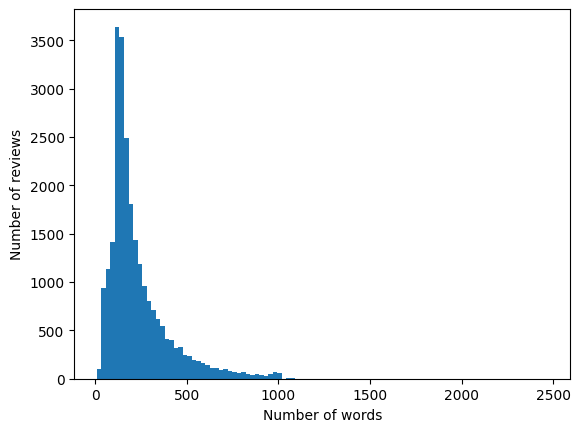

In [20]:
### 각 리뷰의 단어 수 --> 시각화
# plt.hist(length_list, bins=1000)
# plt.show()

# train_word_counts.plot(kind='hist')
# plt.show()

plt.hist(train_word_counts.values, bins=100)
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()

In [21]:
### 각 리뷰의 단어 개수 분포 --> 통계량 추출

# 리뷰 단어 개수 최대 값
max = np.max(train_word_counts)

# 리뷰 단어 개수 최소 값
min = np.min(train_word_counts)

# 리뷰 단어 개수 평균 값
mean = np.mean(train_word_counts)

# 리뷰 단어 개수 중간 값(제 2사분위 값)
median = np.median(train_word_counts)

# 리뷰 단어 개수 제 1 사분위 값
q1 = np.percentile(train_word_counts, 25)

# 리뷰 단어 개수 제 3 사분위 값
q3 = np.percentile(train_word_counts, 75)

# 리뷰 단어 개수 --> 90%에 해당하는 값
q90 = np.percentile(train_word_counts, 90)

# 결과 확인하기
print(f'리뷰 단어 개수 최대 값 : {max}')
print(f'리뷰 단어 개수 최소 값 : {min}')
print(f'리뷰 단어 개수 평균 값 : {mean}')
print(f'리뷰 단어 개수 중간 값 : {median}')
print(f'리뷰 단어 개수 q1 값 : {q1}')
print(f'리뷰 단어 개수 q3 값 : {q3}')
print(f'리뷰 단어 개수 90% 값 : {q90}')

리뷰 단어 개수 최대 값 : 2470
리뷰 단어 개수 최소 값 : 10
리뷰 단어 개수 평균 값 : 233.78764
리뷰 단어 개수 중간 값 : 174.0
리뷰 단어 개수 q1 값 : 127.0
리뷰 단어 개수 q3 값 : 284.0
리뷰 단어 개수 90% 값 : 458.0


#### 단어 빈도수 시각화 

In [22]:
### review 컬럼 --> 문자열 데이터로 변환

str_review = ""

for review in train_data.review.values:
    str_review += review

print(f'문자열 데이터의 단어 수 = {train_word_counts.sum()}')

문자열 데이터의 단어 수 = 5844691


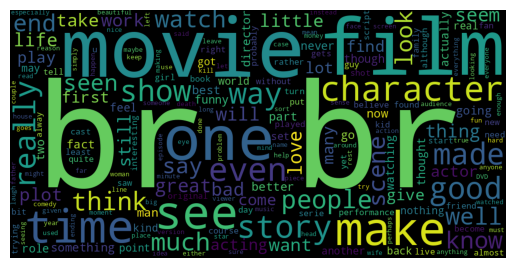

In [23]:
### WordCloud를 이용한 단어 빈도수 시각화

# 필요한 라이브러리 임폴트
from wordcloud import WordCloud

# 객체 생성
wordcloud = WordCloud(
    width=1000,
    height=500
)

# 이미지 생성
wordcloud.generate(str_review)

# 이미지 출력
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
### 문장 부호(?, .) 및 숫자 비율

# 물음표가 있는 리뷰의 비율

# bool_list = []

# for review in train_data.review.values:
#     result = ('?' in review)
#     bool_list.append(result)

# bool_list_array = np.array(bool_list)

# 물음표가 있는 리뷰의 비율
ratio_qmark = train_data.review.apply(lambda x:'?' in x).mean()

# 마침표가 있는 리뷰의 비율
ratio_fullstop = train_data.review.apply(lambda x:'.' in x).mean()

# 숫자가 있는 리뷰의 비율
ratio_number = train_data.review.apply(lambda x: x.isdigit())

print(ratio_qmark)

0.29552


### 데이터 전처리

In [4]:
### 필요한 라이브러리 임폴트
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
import pandas as pd
import numpy as np

In [5]:
### nltk --> 불용어 다운로드 및 설치
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
### nltk --> 불용어 리스트 생성
stopwords_list = stopwords.words('english')

# 생성된 불용어 리스트 확인
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
### 전처리 함수를 정의하기 위한 테스트 데이터 생성

# 리뷰 1개 추출
review = train_data.review[0]

# 결과 확인하기
print(review)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

In [28]:
### HTML tag 제거

# BeautifulSoup 객체 생성 --> get_text() --> tag를 제외한 text 추출
review_text = BeautifulSoup(review, 'lxml').get_text()

# 결과 확인하기
print(review_text)

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

In [29]:
### 영어 문자를 제외한 나머지 --> 공백으로 치환
review_text = re.sub('[^a-zA-Z ]', "", review_text)

# 결과 확인하기
print(review_text)

With all this stuff going down at the moment with MJ ive started listening to his music watching the odd documentary here and there watched The Wiz and watched Moonwalker again Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent Moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released Some of it has subtle messages about MJs feeling towards the press and also the obvious message of drugs are bad mkayVisually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of himThe actual feature film bit when it finally starts is only on for  minutes or so exc

In [30]:
### 불용어 제거 

# 불용어 리스트 생성
print(stopwords_list)

# 텍스트 데이터 --> 소문자 변환
review_text = review_text.lower() 


print('-'*80)

# 텍스트 데이터 --> nltk.word_tokenize() --> 토큰화
words = nltk.word_tokenize(review_text)
print(words)

print('-'*80)

# clean_words= []
# for word in words:
#     if word not in stopwords_list:
#         clean_words.append(word)

clean_words = [word for word in words if word not in stopwords_list]

# 결과 확인하기
print(clean_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
### 토큰(단어) 리스트 --> join() --> 문장 생성
clean_review = ' '.join(clean_words)

# 결과 확인하기
print(clean_review)

stuff going moment mj ive started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mjs feeling towards press also obvious message drugs bad mkayvisually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice himthe actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pescis character ranted wanted people know supplying drugs etc dunno maybe hates mjs musiclots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors

In [37]:
### 전처리 함수 정의

def preprocessing(review, remove_stopwords=False):
    # 불용어 제거는 옵션으로 선택 가능
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, 'lxml').get_text()
    # 2. 영어와 공백을 제외한 나머지 문자, 숫자를 공백(" ")으로 대체
    review_text = re.sub("[^a-zA-Z ]", " ", review_text)  
    # 3. 대문자 --> 소문자, word_tokenize()로 토큰화
    words = nltk.word_tokenize(review_text.lower())
    # 4. 불용어 제거
    if remove_stopwords:
        # 불용어 리스트 생성
        stopwords_list = stopwords.words('english')   
        # 불용어가 아닌 단어(토큰)들로 이루어진 새로운 리스트 생성
        clean_words = [word for word in words if word not in stopwords_list] 
        # 5. 불용어가 아닌 단어 리스트로부터 문장 생성 
        clean_review = ' '.join(clean_words)   
    else:
        # 불용어 제거하지 않는 경우
        clean_review = ' '.join(words)

    return clean_review

### 5/8 실습

In [ ]:
### review 컬럼에 대해서 전처리 함수 실행

clean_train_reviews = []

for review in train_data['review']:
    preprocessed = preprocessing(review, remove_stopwords=True)
    clean_train_reviews.append(preprocessed)

# 결과 확인하기
clean_train_reviews[0]

<ipython-input-8-914d7cd018f7>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'lxml').get_text()


'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [ ]:
### 전처리한 결과 --> 데이터프레임 생성
clean_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment':train_data['sentiment']})

# 결과 확인하기
clean_df

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0


In [ ]:
### 토큰화 --> 정수 인코딩 실행

# 필요한 라이브러리 임폴트
import tensorflow as tf

# Tokenizer 객체 생성
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# 단어 사전 생성
tokenizer.fit_on_texts(clean_train_reviews)

# 정수 인코딩 실행
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

# 결과 확인하기
print(text_sequences[0])

[404, 70, 419, 8813, 505, 2457, 115, 54, 872, 515, 178, 18683, 178, 11240, 165, 79, 14, 661, 2458, 117, 92, 10, 498, 4074, 165, 22, 210, 580, 2334, 1194, 11240, 71, 4826, 71, 634, 2, 253, 70, 11, 302, 1663, 485, 1144, 3266, 8813, 411, 792, 3342, 17, 440, 599, 1500, 15, 4424, 1851, 997, 146, 342, 1442, 742, 2425, 4, 8813, 418, 70, 636, 69, 237, 94, 540, 8813, 26052, 26053, 120, 1, 8813, 323, 8, 47, 20, 323, 167, 10, 207, 632, 634, 2, 116, 291, 382, 121, 15532, 3315, 1501, 573, 733, 10011, 922, 11576, 821, 1239, 1408, 360, 8813, 221, 15, 575, 8813, 22221, 2274, 13423, 733, 10011, 27, 28603, 340, 16, 41, 18684, 1500, 388, 11241, 165, 3962, 8813, 115, 626, 498, 80, 4, 8813, 1430, 380, 2163, 114, 1919, 2504, 573, 17, 60, 100, 4875, 5100, 260, 1268, 26054, 15, 573, 492, 743, 636, 630, 3, 394, 164, 445, 114, 614, 3267, 1160, 683, 48, 1175, 224, 1, 16, 4, 8813, 3, 506, 62, 25, 16, 639, 133, 231, 95, 7426, 599, 3439, 8813, 37245, 1864, 1, 128, 342, 1442, 247, 3, 864, 16, 42, 1487, 996, 2334, 12

In [ ]:
### 단어 사전 확인

# 단어 사전 추출
vocab = tokenizer.word_index

# 결과 확인하기
print(f'단어의 수 = {len(vocab)}')
print('-'*80)
print(f'단어 사전 확인 : \n{vocab}')

단어의 수 = 74061
--------------------------------------------------------------------------------
단어 사전 확인 : 
{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part

In [ ]:
### 단어 사전에 <PAD> 토큰 추가
vocab['<PAD>'] = 0

# 결과 확인하기
print(f'단어의 수 = {len(vocab)}')
print('-'*80)
print(f'단어 사전 확인 : \n{vocab}')

단어의 수 = 74062
--------------------------------------------------------------------------------
단어 사전 확인 : 
{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part

In [ ]:
### 리뷰의 길이를 동일하게 처리 --> pad_sequences(sequences, maxlen, padding)

# 문장의 최대 길이 설정 --> 3사분위 수 이용
max_length = 284

# pad_sequences() 실행
train_inputs = tf.keras.utils.pad_sequences(sequences=text_sequences, maxlen=max_length, padding='post')

# 결과 확인하기 --> 모양
print(train_inputs.shape)

(25000, 284)


In [ ]:
train_inputs[454]

array([ 6858,  8082,   277,   999,   158,  7846,  3777,   158,   103,
        7597,    23,  1942, 12738,  2228, 17945,  8028,  9876,  1746,
        1282,  1672,   335, 12738,   400,  3455, 46669,   234,    45,
        1126,  1871,   630,   562, 17946,   128,  3973, 11336,   115,
       37555,   158,  4926,   368,   294,   335, 12739,  1746,  5879,
         154,  1404,    14,   290,    27,  2006,  2489,    74,   110,
        3817, 37556,  3032, 12738,   131,   280,   102, 17119,  1027,
         136,   551,   136,   393,  1875,  5166,   275,  1358,     4,
        3939,    13,    33,  3041,   131, 26256, 10816, 32378, 15073,
        7554, 15073,  4137,   740,  1480, 46670,    90,  1160,  6864,
       12738, 11680,  2153,   154,  3412,  9446,  1507,  2258,  1854,
           8,   728, 17120,   748,  2957,   154,    11, 12738,  2042,
       12738,     1,   679, 17121,   383,   125,     5,  1023,    27,
          98,   417,    98,     6, 46671, 24140,    57,   132,    93,
       46672,  6334,

In [ ]:
### sentiment 컬럼 --> 넘파이 배열로 변환
train_labels = train_data['sentiment'].values

# 결과 확인하기
print(f'모양 : {train_labels.shape}')
print('-'*80)
print(f'값 : {train_labels}')

모양 : (25000,)
--------------------------------------------------------------------------------
값 : [1 1 0 ... 0 0 1]


### 결과 저장

In [ ]:
### 파일 경로 설정
train_input_data = 'train_inputs.npy'
train_label_data = 'train_labels.npy'
train_clean_data = 'clean_df.csv'

In [ ]:
### 전처리 된 데이터를 넘파이 형태로 저장
np.save(train_input_data, train_inputs)
np.save(train_label_data, train_labels)

In [ ]:
### 정제된 텍스트 데이터를 csv 형태로 저장
clean_df.to_csv(train_clean_data, index=False)

In [ ]:
### 저장된 데이터 불러오기
train_inputs = np.load(train_input_data)
train_labels = np.load(train_label_data)
clean_df = pd.read_csv(train_clean_data)

In [ ]:
### 결과 확인하기
print(train_inputs[0])
print('-'*80)
print(train_labels[0])
print('-'*80)
clean_df

[  404    70   419  8813   505  2457   115    54   872   515   178 18683
   178 11240   165    79    14   661  2458   117    92    10   498  4074
   165    22   210   580  2334  1194 11240    71  4826    71   634     2
   253    70    11   302  1663   485  1144  3266  8813   411   792  3342
    17   440   599  1500    15  4424  1851   997   146   342  1442   742
  2425     4  8813   418    70   636    69   237    94   540  8813 26052
 26053   120     1  8813   323     8    47    20   323   167    10   207
   632   634     2   116   291   382   121 15532  3315  1501   573   733
 10011   922 11576   821  1239  1408   360  8813   221    15   575  8813
 22221  2274 13423   733 10011    27 28603   340    16    41 18684  1500
   388 11241   165  3962  8813   115   626   498    80     4  8813  1430
   380  2163   114  1919  2504   573    17    60   100  4875  5100   260
  1268 26054    15   573   492   743   636   630     3   394   164   445
   114   614  3267  1160   683    48  1175   224   

,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1
...,...,...
24995,seems like consideration gone imdb reviews fil...,0
24996,believe made film completely unnecessary first...,0
24997,guy loser get girls needs build picked stronge...,0
24998,minute documentary bu uel made early one spain...,0
